---
## Project Overview: Book Popularity Classification

This notebook presents a **multi-class classification** project where the goal is to predict a book's *popularity class* using a **Decision Tree** model. The target variable includes three classes:
- **Popular**
- **Average**
- **Unpopular**

### Key Highlights:
- Identified and resolved **data leakage**: the feature `log_ratings_count` was dropped as the target column was derived from it.
- Carefully examined **feature correlations**. Despite high correlation with dropped features, `log_text_review_count` was retained due to its predictive value and no direct relation to the target.
- Applied **Stratified K-Fold Cross-Validation (10 folds)** to ensure balanced evaluation across all classes.
- Achieved strong and consistent model performance
---


In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [148]:
df = pd.read_csv('C:/Users/USER/Desktop/cleaned_data.csv')
df.head()

,average_rating,log_ratings_count,log_text_review_count,log_num_pages,book_age,is_box_set,popularity_class,author_type_group,author_type_solo
0,3.91,10.470958,7.223296,5.888878,5.0,0.0,1.0,0.0,1.0
1,3.99,5.049856,3.091042,5.814131,6.0,0.0,2.0,0.0,1.0
2,4.04,10.549255,7.178545,5.262690,6.0,0.0,1.0,0.0,0.0
3,4.50,3.295837,1.609438,4.836282,6.0,0.0,2.0,0.0,0.0
4,3.72,10.936174,8.583355,5.641907,6.0,0.0,1.0,0.0,1.0


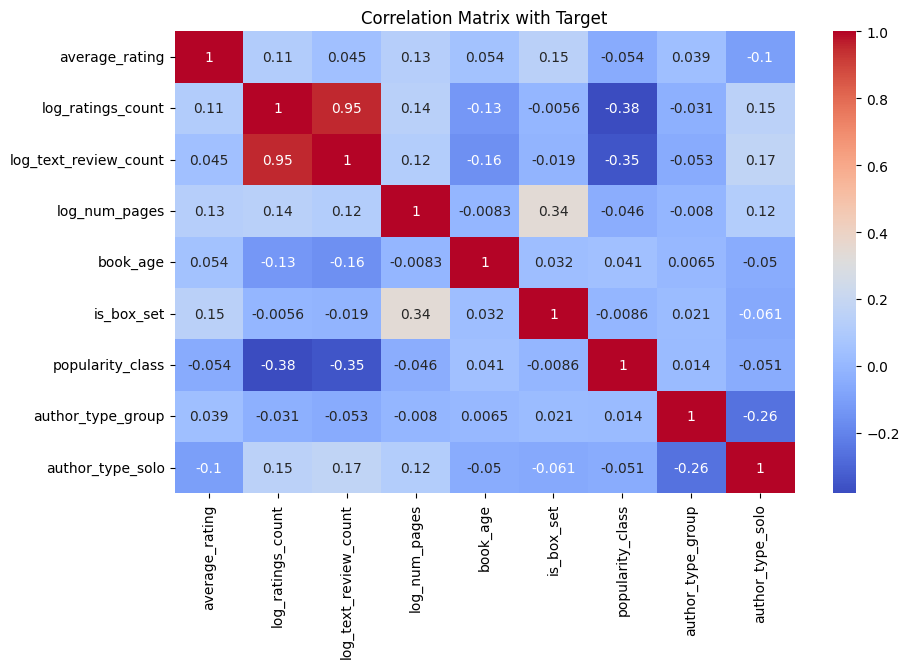

In [149]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Target')
plt.show()

In [152]:
X = df.drop(['popularity_class', 'log_ratings_count'], axis=1)
y = df['popularity_class']

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracy_list, precision_list, recall_list, f1_list = [], [], [], []

# Cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    clf = DecisionTreeClassifier(random_state=42, max_depth=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    accuracy_list.append(acc)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)
    
    print(f"\nFold {fold} — Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

# Report averages
print("\n--- Average Results Across Folds ---")
print(f"Average Accuracy: {np.mean(accuracy_list):.4f}")
print(f"Average Precision: {np.mean(precision_list):.4f}")
print(f"Average Recall: {np.mean(recall_list):.4f}")
print(f"Average F1 Score: {np.mean(f1_list):.4f}")



Fold 1 — Accuracy: 0.8350, Precision: 0.8330, Recall: 0.8350, F1: 0.8338

Fold 2 — Accuracy: 0.8290, Precision: 0.8283, Recall: 0.8290, F1: 0.8278

Fold 3 — Accuracy: 0.8521, Precision: 0.8555, Recall: 0.8521, F1: 0.8534

Fold 4 — Accuracy: 0.8431, Precision: 0.8454, Recall: 0.8431, F1: 0.8440

Fold 5 — Accuracy: 0.8459, Precision: 0.8502, Recall: 0.8459, F1: 0.8475

Fold 6 — Accuracy: 0.8379, Precision: 0.8465, Recall: 0.8379, F1: 0.8404

Fold 7 — Accuracy: 0.8308, Precision: 0.8375, Recall: 0.8308, F1: 0.8332

Fold 8 — Accuracy: 0.8298, Precision: 0.8326, Recall: 0.8298, F1: 0.8303

Fold 9 — Accuracy: 0.8278, Precision: 0.8294, Recall: 0.8278, F1: 0.8282

Fold 10 — Accuracy: 0.8278, Precision: 0.8286, Recall: 0.8278, F1: 0.8274

--- Average Results Across Folds ---
Average Accuracy: 0.8359
Average Precision: 0.8387
Average Recall: 0.8359
Average F1 Score: 0.8366


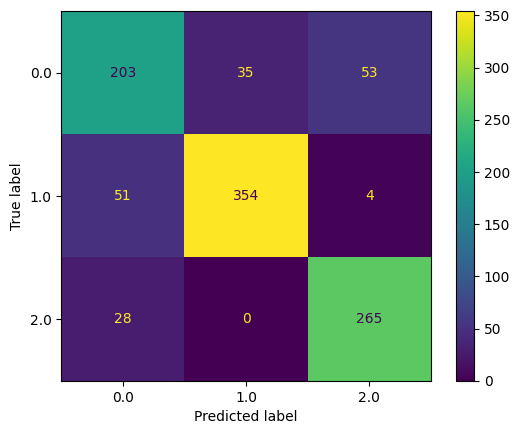

In [153]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()


### **Confusion Matrix Summary**

---

#### Class 0 (Unpopular)
- Correctly predicted as class 0: 203  
- Misclassified as class 1: 35  
- Misclassified as class 2: 53  
- **Summary**: Moderate performance. A few class 0 samples are misclassified as class 1 or 2.

#### Class 1 (Average)
- Correctly predicted as class 1: 354  
- Misclassified as class 0: 51  
- Misclassified as class 2: 4  
- **Summary**: Good performance. High correct predictions with minimal misclassifications.

#### Class 2 (Popular)
- Correctly predicted as class 2: 265 
- Misclassified as class 0: 28 
- Misclassified as class 1: 0  
- **Summary**: Good performance. Especially strong distinction from class 1.

### Key Takeaways
- The model performs best on class 1, with high precision and recall.
- Class 2 is well captured, especially with no confusion with class 1.
- Class 0 is the most challenging, often confused with both class 1 and class 2.
---
